# HM5

In [1]:
# importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

# creation of a pandas dataframe with nodes coordinates
fileNodes = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\nodesInformations.co", "r")
latitude = 0; longitude = 0; id = 0; matrix = []
with fileNodes as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "v":
            id = int(row[1])
            latitude = int(row[3][:len(row[3])-1]) / 10 ** (len(row[3]) - 3)
            longitude = -int(row[2][1:len(row[2])-1]) / 10 ** (len(row[2]) - 5)
            matrix.append([id, latitude, longitude])
nodesCoordinates = pd.DataFrame(matrix, columns = ["Id", "Latitude", "Longitude"])
fileNodes.close()

# creation of a pandas dataframe with metrics distances
fileMetricDist = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\distanceMatrixMeters.gr", "r")
matrix = []
with fileMetricDist as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "a":
            matrix.append([int(row[1]), int(row[2]), int(row[3])])
edgesMetrDist = pd.DataFrame(matrix, columns = ["id_n1", "id_n2", "metric_dist"])
fileMetricDist.close()

# creation of a pandas dataframe with time distances
fileTimeDist = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\distanceMatrixSeconds.gr", "r")
matrix = []
with fileTimeDist as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "a":
            matrix.append([int(row[1]), int(row[2]), int(row[3])])
edgesTimeDist = pd.DataFrame(matrix, columns = ["id_n1", "id_n2", "time_dist"])
matrix = []

# creation of a pandas dataframe with network distances
fileTimeDist = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\distanceMatrixSeconds.gr", "r")
matrix = []
with fileTimeDist as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "a":
            matrix.append([int(row[1]), int(row[2]), 1])
edgesNetDist = pd.DataFrame(matrix, columns = ["id_n1", "id_n2", "network_dist"])
fileTimeDist.close(); matrix = []

# choice of the function (made by the user)
choice = 0
while choice != -1:
    choice = input("Insert the number of the function that you want to use (from 1 to 4, -1 to exit). \n1 to find the neighbours in a limited distance\n2 to find the smartest network\n3 to find the shortest path into an ordered list of waypoints\n4 to find the path into a set of waypoints\n")
    while int(choice) not in [-1, 1, 2, 3, 4]:
            choice = input("Insert the number of the function that you want to use (from 1 to 4, -1 to exit). \n1 to find the neighbours in a limited distance\n2 to find the smartest network\n3 to find the shortest path into an ordered list of waypoints\n4 to find the path into a set of waypoints\n")
    if int(choice) == 1:
        source = input("Insert the node where you want to start: ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        threshold = input("Insert the threshold: ")
        function1(int(source), functionDist, int(threshold))
    if int(choice) == 2:
        nodes = input("Insert the nodes that you want to include into your walk (divided by a space): ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        function2(list(map(int, nodes.split(" "))), functionDist)
    if int(choice) == 3:
        source = input("Insert the node where you want to start: ")
        nodes = input("Insert the nodes that you want to include into your walk (divided by a space): ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        function3(int(source), list(map(int, nodes.split(" "))), functionDist)
    if int(choice) == 4:
        source = input("Insert the number of node that represent the node where you want to start: ")
        nodes = input("Insert the nodes that you want to include into your walk (divided by a space): ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        function4(int(source), list(map(int, nodes.split(" "))), functionDist)
    if int(choice) == -1: break

Insert the number of the function that you want to use (from 1 to 4, -1 to exit). 
1 to find the neighbours in a limited distance
2 to find the smartest network
3 to find the shortest path into an ordered list of waypoints
4 to find the path into a set of waypoints
-1


### Function1

In [37]:
# The dijkstra algoritm for the first function
def dijkstraF1(ds, s, threshold):
    # initialisation of variables 
    neighbours = [[0, s]]; result = []
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[s-1] = [s, 0]
    result = np.array(result)
    while len(neighbours) != 0:
        costs = [neighbour[0] for neighbour in neighbours]
        if min(costs) > threshold: return result
        for neighbour in neighbours:
            if neighbour[0] == min(costs):
                node = neighbour[1]
                elRem = neighbour
        neighbours.remove(elRem)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] != result[node-1][0]:
                if result[app[j, 1]-1][0] != -1:
                    if result[app[j, 1]-1][1] > result[node-1][1] + app[j, 2]:
                        result[app[j, 1]-1][0] = node
                        result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]
                else:
                    neighbours.append([result[node-1][1] + app[j, 2], app[j, 1]])
                    result[app[j, 1]-1][0] = node
                    result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]
    return result

def function1(source, functionDist, threshold):
    finalRes = []
    
    if functionDist == "meters": 
        resultDij = dijkstraF1(edgesMetrDist, source, threshold)
        edCol = "Red"
    if functionDist == "time": 
        resultDij = dijkstraF1(edgesTimeDist, source, threshold)
        edCol = "Blue"
    if functionDist == "network": 
        resultDij = dijkstraF1(edgesNetDist, source, threshold)
        edCol = "Darkgreen"
        
        
    for i in range(len(resultDij)):
        if resultDij[i][1] < threshold:
            finalRes.append([i+1, resultDij[i][0]])
    result = nx.Graph()
    for i in range(len(finalRes)):
        result.add_node(finalRes[i][0])
        result.add_edge(finalRes[i][0], finalRes[i][1])
    colors = []; pos = nx.spring_layout(result)
    for node in result.nodes:
        if node == source:
            colors.append("Red")
        else:
            colors.append("Cyan")
    nx.draw_networkx_nodes(result, pos, node_color = colors)
    nx.draw_networkx_edges(result, pos, edge_color = edCol)
    nx.draw_networkx_labels(result, pos)

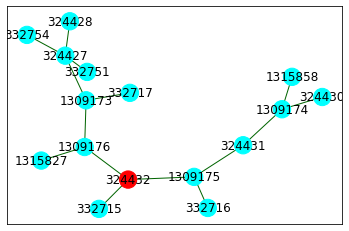

In [38]:
function1(324432, "network", 5)

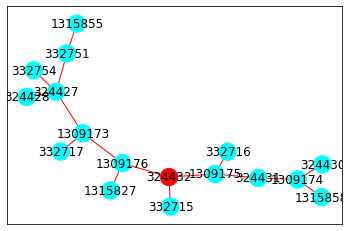

In [42]:
function1(324432, "meters", 2000)

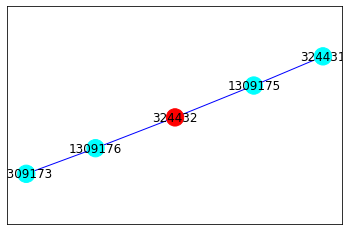

In [40]:
function1(324432, "time", 2000)

### Function 2

In [12]:
def mst_prim(ds, connNodes, notConnNodes):
    # inizialisation of variables
    edges = []; result = []
    
    # costruction of the result
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[connNodes[0]-1] = [connNodes[0], 0]
    result = np.array(result)
    
    # initialize of the array that contain the edges
    app = np.array(ds[ds["id_n1"] == connNodes[0]])
    for j in range(app.shape[0]):
        if app[j, 1] in notConnNodes:
            edges.append(app[j])
            
    # Prim's algoritm
    while len(notConnNodes) != 0 and len(edges) != 0:
        costs = [edge[2] for edge in edges]
        for edge in edges:
            if edge[2] == min(costs):
                node = edge[1]
                elRem = edge
                break
        edges.remove(elRem)
        connNodes.append(node); notConnNodes.remove(node)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] in notConnNodes:
                edges.append(app[j])
        if result[elRem[1]-1][0] == -1:
            result[elRem[1]-1][0] = elRem[0]; result[elRem[1]-1][1] = elRem[2]
    return result

def function2(nodes, functionDist):
    # inizializing principal variables
    finalRes = []
    connNodes = [nodes[0]]; notConnNodes = nodes; notConnNodes.remove(nodes[0])
    
    # construction of the MST with Prim's algorithm
    if functionDist == "meters": 
        resultDij = mst_prim(edgesMetrDist, connNodes, notConnNodes)
        edCol = "Red"
    if functionDist == "time": 
        resultDij = mst_prim(edgesTimeDist, connNodes, notConnNodes)
        edCol = "Blue"
    if functionDist == "network": 
        resultDij = mst_prim(edgesNetDist, connNodes, notConnNodes)
        edCol = "Darkgreen"
    
    # construction of the result
    for node in connNodes + notConnNodes:
        if resultDij[node-1][0] == -1:
            return "Not Possible"
        else:
            finalRes.append([node, resultDij[node-1][0]])
    for el in finalRes:
        if el[0] == el[1]:
            finalRes.remove(el)
    result = nx.Graph()
    for edge in finalRes:
        result.add_nodes_from(edge); result.add_edge(edge[0], edge[1])
    
    # showing the result
    for edge in result.edges:
        print(edge)
    pos = nx.spring_layout(result)
    nx.draw_networkx_nodes(result, pos, node_color = "cyan")
    nx.draw_networkx_edges(result, pos, edge_color = edCol)
    nx.draw_networkx_labels(result, pos)

(1309175, 324432)
(1309175, 332716)
(324432, 332715)


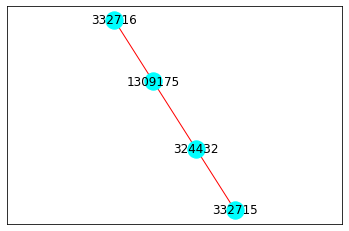

In [13]:
function2([324432, 1309175, 332716, 332715], "meters")

(1309175, 324432)
(1309175, 332716)
(324432, 332715)


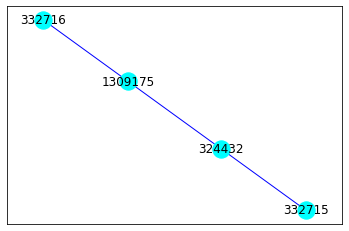

In [82]:
function2([324432, 1309175, 332716, 332715], "time")

(1309175, 324432)
(1309175, 332716)
(324432, 332715)


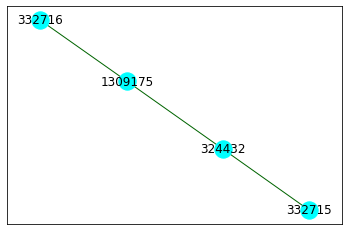

In [14]:
function2([324432, 1309175, 332716, 332715], "network")

### Function3

In [10]:
def dijkstraF3(ds, s, exit):
    neighbours = [[0, s]]; result = []
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[s-1] = [s, 0]
    result = np.array(result)
    while len(neighbours) != 0:
        costs = [neighbour[0] for neighbour in neighbours]
        if result[exit-1][0] != -1: return result
        for neighbour in neighbours:
            if neighbour[0] == min(costs):
                node = neighbour[1]
                elRem = neighbour
        neighbours.remove(elRem)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] != result[node-1][0]:
                if result[app[j, 1]-1][0] != -1:
                    if result[app[j, 1]-1][1] > result[node-1][1] + app[j, 2]:
                        result[app[j, 1]-1][0] = node
                        result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]
                else:
                    neighbours.append([result[node-1][1] + app[j, 2], app[j, 1]])
                    result[app[j, 1]-1][0] = node
                    result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]

def function3(source, nodes, functionDist):
    # inizialisation of variables and choice of the edges color
    finalRes = set(); sourceIn = source
    if functionDist == "meters": edCol = "Red"
    if functionDist == "time": edCol = "Blue"
    if functionDist == "network": edCol = "Darkgreen"
    
    # controlling if it's possible to find a path through the nodes
    for node in nodes:
        if len(edgesMetrDist[edgesMetrDist["id_n2"] == node]) == 0:
            return "Not possible"
        
    # extracting the result based on subsequent Dijkstra paths
    for i in range(len(nodes)):
        if functionDist == "meters": resultDij = dijkstraF3(edgesMetrDist, source, nodes[i])
        if functionDist == "time": resultDij = dijkstraF3(edgesTimeDist, source, nodes[i])
        if functionDist == "network": resultDij = dijkstraF3(edgesNetDist, source, nodes[i])
        partRes = set()
        pred=nodes[i]
        while resultDij[pred-1][0] != source: 
            edge = (resultDij[pred-1][0],pred)
            partRes.add(edge)
            pred=resultDij[pred-1][0]
            if resultDij[pred-1][0] == source: 
                partRes.add((pred,source))
        source = nodes[i]
        finalRes = finalRes.union(partRes)
    
    # creation of result graph
    result = nx.Graph()
    for edge in finalRes:
        result.add_nodes_from(edge); result.add_edge(edge[0], edge[1])
        
    # vizualization of the result
    colors = []; pos = nx.spring_layout(result)
    for node in result.nodes:
        if node == sourceIn:
            colors.append("Red")
        else:
            colors.append("Cyan")
    nx.draw_networkx_nodes(result, pos, node_color = colors)
    nx.draw_networkx_edges(result, pos, edge_color = edCol)
    nx.draw_networkx_labels(result, pos)

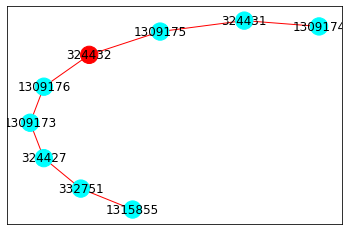

In [16]:
function3(324432, [332751, 1315855, 1309174], "meters")

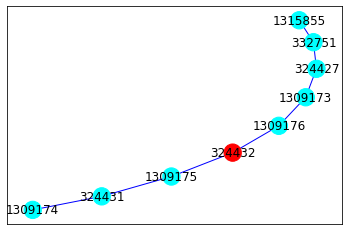

In [12]:
function3(324432, [332751, 1315855, 1309174], "time")

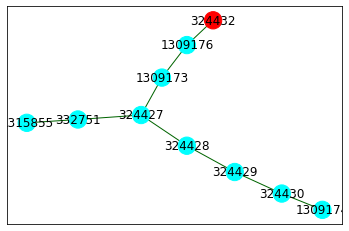

In [13]:
function3(324432, [332751, 1315855, 1309174], "network")

### Function 4

In [2]:
# importing libraries
import numpy as np
import networkx as nx

def dijkstraF4(ds, s, nodes):
    neighbours = [[0, s]];
    result = []
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[s - 1] = [s, 0]
    result = np.array(result)
    while len(neighbours) != 0:
        costs = [neighbour[0] for neighbour in neighbours]
        for el in nodes:
            if result[el - 1][0] != -1: return el, result
        for neighbour in neighbours:
            if neighbour[0] == min(costs):
                node = neighbour[1]
                elRem = neighbour
        neighbours.remove(elRem)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] != result[node - 1][0]:
                if result[app[j, 1] - 1][0] != -1:
                    if result[app[j, 1] - 1][1] > result[node - 1][1] + app[j, 2]:
                        result[app[j, 1] - 1][0] = node
                        result[app[j, 1] - 1][1] = result[node - 1][1] + app[j, 2]
                else:
                    neighbours.append([result[node - 1][1] + app[j, 2], app[j, 1]])
                    result[app[j, 1] - 1][0] = node
                    result[app[j, 1] - 1][1] = result[node - 1][1] + app[j, 2]


def function4(source, nodes, functionDist, ds):
    # inizialisation of variables and choice of the edges color
    finalRes = set();
    sourceIn = source
    if functionDist == "meters": edCol = "Red"
    if functionDist == "time": edCol = "Blue"
    if functionDist == "network": edCol = "Darkgreen"

    # controlling if it's possible to find a path through the nodes
    for node in nodes:
        if len(ds[ds["id_n2"] == node]) == 0:
            return "Not possible"

    # extracting the result based on subsequent Dijkstra paths
    while len(nodes) != 0:
        if functionDist == "meters": node, resultDij = dijkstraF4(ds, source, nodes)
        if functionDist == "time": node, resultDij = dijkstraF4(ds, source, nodes)
        if functionDist == "network": node, resultDij = dijkstraF4(ds, source, nodes)
        pred = node;
        nodes.remove(node);
        partRes = set()
        while resultDij[pred - 1][0] != source:
            edge = (resultDij[pred - 1][0], pred);
            partRes.add(edge)
            pred = resultDij[pred - 1][0]
            if resultDij[pred - 1][0] == source:
                partRes.add((pred, source))
        source = node;
        finalRes = finalRes.union(partRes)

    # creation of result graph
    result = nx.Graph()
    for edge in finalRes:
        result.add_nodes_from(edge);
        result.add_edge(edge[0], edge[1])

    # vizualization of the result
    colors = [];
    pos = nx.spring_layout(result)
    for node in result.nodes:
        if node == sourceIn:
            colors.append("Red")
        else:
            colors.append("Cyan")
    nx.draw_networkx_nodes(result, pos, node_color=colors)
    nx.draw_networkx_edges(result, pos, edge_color=edCol)
    nx.draw_networkx_labels(result, pos)

C:\Users\asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


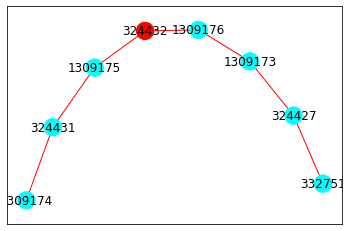

In [4]:
function4(324432, [332751, 1315855, 1309174], "meters", edgesMetrDist)

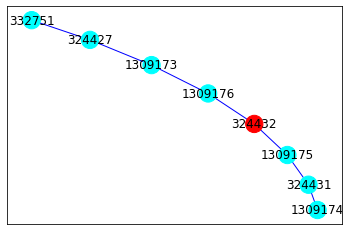

In [5]:
function4(324432, [332751, 1315855, 1309174], "time", edgesTimeDist)

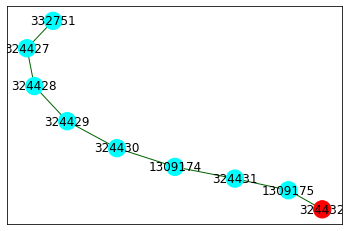

In [6]:
function4(324432, [332751, 1315855, 1309174], "network", edgesNetDist)